In [1]:
pip install scikit-learn==1.2.1

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [4]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

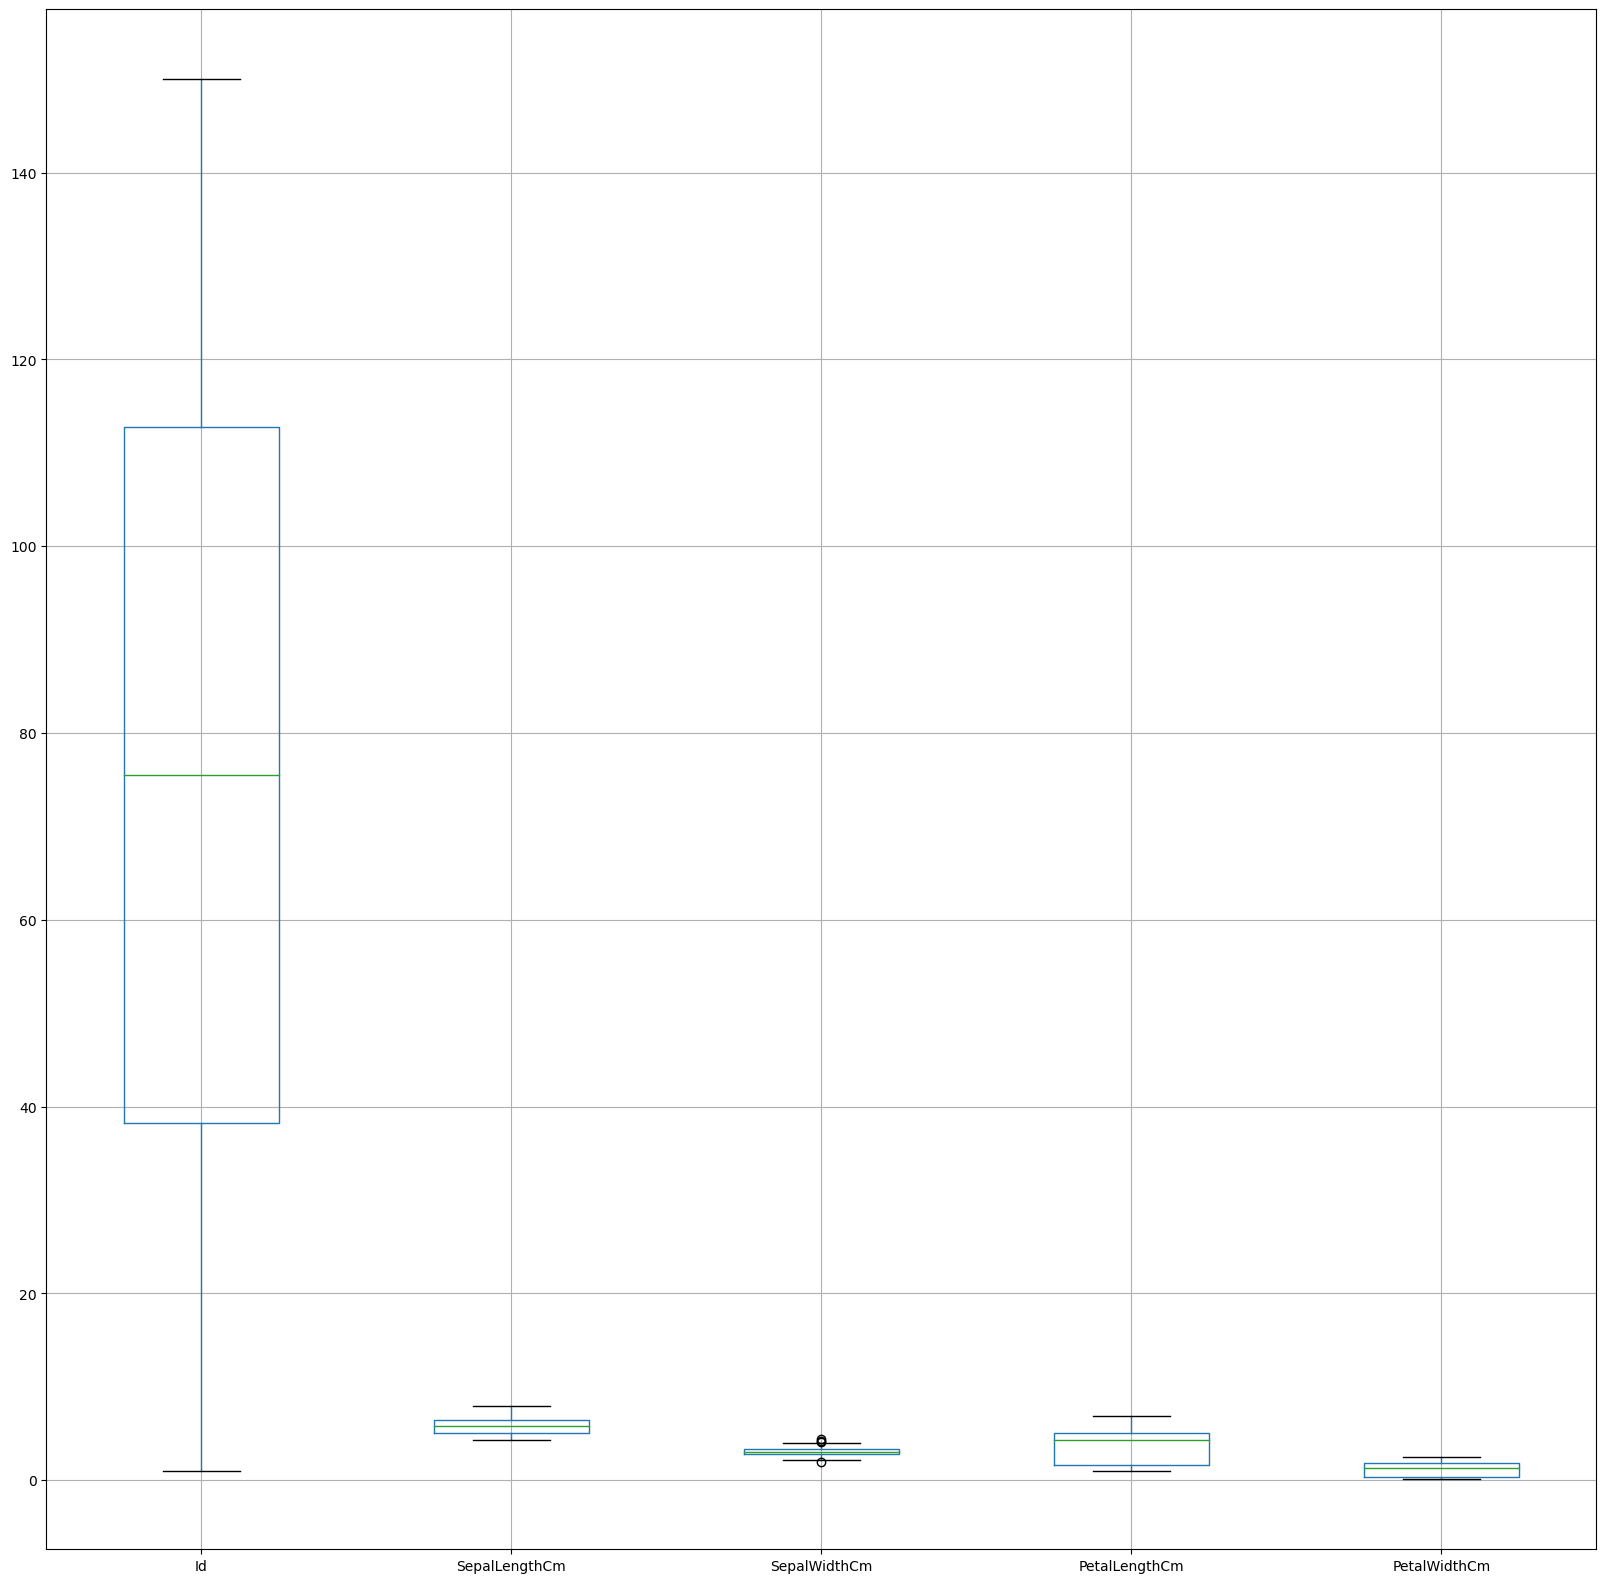

In [7]:
plt.figure(figsize=(20,20))
df[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].boxplot()

<AxesSubplot:xlabel='Species', ylabel='count'>

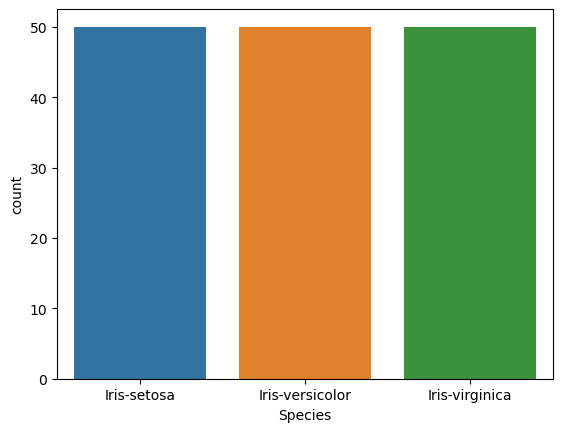

In [8]:
sns.countplot(df['Species'])

In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [12]:
x=df.drop(['Species','Id'],axis=1)
y=df['Species']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=12)

In [14]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [15]:
# Trainig
y_pred_train = lr_model.predict(x_train)
con_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",con_mat)
acc_train = accuracy_score(y_train,y_pred_train)
print(" Accuracy :",acc_train)
clf_report = classification_report(y_train,y_pred_train)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[35  0  0]
 [ 0 36  2]
 [ 0  1 38]]
 Accuracy : 0.9732142857142857
Classication Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.95      0.96        38
           2       0.95      0.97      0.96        39

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



In [16]:
# Testing
y_pred = lr_model.predict(x_test)
con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)
acc_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",acc_test)
clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[15  0  0]
 [ 0 11  1]
 [ 0  0 11]]
 Accuracy : 0.9736842105263158
Classication Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [17]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
# Training data evaluation without HYP
y_pred_train=dt_clf.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix : \n",cnf_matrix)

accuracy_train=accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy_train)


clf_report = classification_report(y_train,y_pred_train)
print("Classification Report: \n",clf_report)

Confusion Matrix : 
 [[35  0  0]
 [ 0 38  0]
 [ 0  0 39]]
Accuracy :  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        39

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [19]:
# Testing data evaluation without HYP
y_pred=dt_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n",cnf_matrix)

accuracy_test=accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy_test)


clf_report = classification_report(y_test,y_pred)
print("Classification Report: \n",clf_report)

Confusion Matrix : 
 [[15  0  0]
 [ 0 10  2]
 [ 0  0 11]]
Accuracy :  0.9473684210526315
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.83      0.91        12
           2       0.85      1.00      0.92        11

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.96      0.95      0.95        38



In [20]:
dt_model=DecisionTreeClassifier()

hyperparameter={'criterion':['gini','entropy'],
               'max_depth': np.arange(3,8),
               'min_samples_split':np.arange(2,20),
               'min_samples_leaf':np.arange(2,15)}
gscv_dt_clf=GridSearchCV(dt_model,hyperparameter,cv=5)
gscv_dt_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [21]:
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [22]:
# Training data evaluation with HYP
dt_clf=DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)
dt_clf.fit(x_train,y_train)

y_pred_train=dt_clf.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix : \n",cnf_matrix)

accuracy_train=accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy_train)


clf_report = classification_report(y_train,y_pred_train)
print("Classification Report: \n",clf_report)

Confusion Matrix : 
 [[35  0  0]
 [ 0 35  3]
 [ 0  0 39]]
Accuracy :  0.9732142857142857
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      0.92      0.96        38
           2       0.93      1.00      0.96        39

    accuracy                           0.97       112
   macro avg       0.98      0.97      0.97       112
weighted avg       0.98      0.97      0.97       112



In [23]:
# Testing data evaluation with HYP

y_pred=dt_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n",cnf_matrix)

accuracy_test=accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy_test)


clf_report = classification_report(y_test,y_pred)
print("Classification Report: \n",clf_report)

Confusion Matrix : 
 [[15  0  0]
 [ 0 10  2]
 [ 0  0 11]]
Accuracy :  0.9473684210526315
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.83      0.91        12
           2       0.85      1.00      0.92        11

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.96      0.95      0.95        38



In [24]:
with open("lr_model.pkl",'wb') as f:
 pickle.dump(lr_model,f)

In [25]:
lr_model.predict([[5.1,3.5,1.4,0.2]])

array([0], dtype=int64)

In [26]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
